# week2授業課題１ 二次元配列と勾配問題

In [36]:
import numpy as np
import matplotlib.pyplot as plt
#日本語で書けるようになる魔法
import japanize_matplotlib

# 【問題１】１次関数
* -50 < x < 50
* y = 1/2x + 1
* ｘとそれに対応するｙを表すndarray(ｘは0.1間隔)

In [37]:
# xを表すndarray
x = np.arange(-50,50.1,0.1).reshape(-1,1)
print('x_shape:',x.shape)
print(x)

# yを表すndarray
y = ((1/2*x) + 1).reshape(-1,1)
print('\ny_shape:',y.shape)
print(y)

x_shape: (1001, 1)
[[-50. ]
 [-49.9]
 [-49.8]
 ...
 [ 49.8]
 [ 49.9]
 [ 50. ]]

y_shape: (1001, 1)
[[-24.  ]
 [-23.95]
 [-23.9 ]
 ...
 [ 25.9 ]
 [ 25.95]
 [ 26.  ]]


# 【問題２】配列の結合
* ｘとｙを結合して，（1001，2）にする．
* ｘ＝0列目，ｙ＝１列目

In [38]:
A = np.hstack((x,y))
print('shape:',A.shape)
A

shape: (1001, 2)


array([[-50.  , -24.  ],
       [-49.9 , -23.95],
       [-49.8 , -23.9 ],
       ...,
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95],
       [ 50.  ,  26.  ]])

# 【問題3】勾配を求める

In [39]:
kobai = np.array([(y[i+1]-y[i])/(x[i+1]-x[i]) for i in range(len(x)-1)])
print('shape:',kobai.shape)
kobai

shape: (1000, 1)


array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

# 【問題4】グラフを描く
### １．1次関数のグラフ

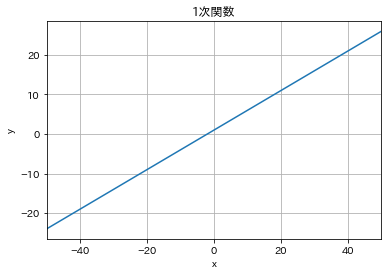

In [40]:
plt.plot(x,y)
plt.xlim(x.min(),x.max())
plt.title('1次関数')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### ２．横軸をx、縦軸を勾配としたグラフ

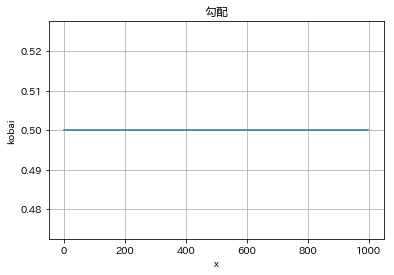

In [41]:
plt.plot(kobai)
plt.xlabel('x')
plt.ylabel('kobai')
plt.title('勾配')
plt.grid()

# 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数

In [82]:
def function1(array_x):
    """
    y = x**2を求める関数

    Parameters
    ----------------
    array_x : ndarray shape(n,1)
    Returns
    ----------------
    array_y : ndarray, shape(n, 1)
    """
    array_y = array_x**2
    array_y = array_y.reshape(-1,1)
    return array_y

In [84]:
def function2(array_x):
    """
    y = 2*x**2 +2**x を求める関数

    Parameters
    ----------------
    array_x : ndarray shape(n,1)
    Returns
    ----------------
    array_y : ndarray, shape(n, 1)
    """
    array_y = 2*array_x**2 + 2**array_x
    array_y = array_y.reshape(-1,1)
    
    return array_y    

In [93]:
def function3(array_x):
    """
    y = sin(x**1/2) を求める関数

    Parameters
    ----------------
    array_x : ndarray shape(n,1)
    Returns
    ----------------
    array_y : ndarray, shape(n, 1)
    """
    array_y = np.sin(array_x**1/2)
    array_y = array_y.reshape(-1,1)
    
    return array_y

In [94]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
    """
    
    x = np.arange(x_range[0],x_range[1],x_range[2]).reshape(-1,1)
    y = function(x).reshape(-1,1)
    
    array_xy = np.hstack((x,y))
    
    gradient = np.array([(y[i+1]-y[i])/(x[i+1]-x[i]) for i in range(len(x)-1)])
    
    return array_xy, gradient

In [98]:
# function1
array_xy1,gradient1 = compute_gradient(function1,x_range=(-50, 50.1, 0.1))
print('array_xy_shape:',array_xy1.shape)
print('gradient_shape:',gradient1.shape)

array_xy_shape: (1001, 2)
gradient_shape: (1000, 1)


In [99]:
# function2
array_xy2,gradient2 = compute_gradient(function2,x_range=(-50, 50.1, 0.1))
print('array_xy_shape:',array_xy2.shape)
print('gradient_shape:',gradient2.shape)

array_xy_shape: (1001, 2)
gradient_shape: (1000, 1)


In [100]:
# function3
array_xy3,gradient3 = compute_gradient(function3,x_range=(0, 50.1, 0.1))
print('array_xy_shape:',array_xy3.shape)
print('gradient_shape:',gradient3.shape)

array_xy_shape: (501, 2)
gradient_shape: (500, 1)


# 【問題6】最小値を求める
* np.argmin(a, axis=None, out=None)
* return:指定された配列a、軸方向のなかで最小値がある最初に出現する値のインデックス                           
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

### １．function1

In [114]:
print('最小値：',np.min(array_xy1[:,1]))
print('最小値index:',np.argmin(array_xy1[:,1]))
print('最小値直前の勾配：',gradient1[np.argmin(array_xy1[:,1])-1])
print('最小値直後の勾配：',gradient1[np.argmin(array_xy1[:,1])+1])

最小値： 5.048709793414476e-25
最小値index: 500
最小値直前の勾配： [-0.1]
最小値直後の勾配： [0.3]


### ２．function2

In [115]:
print('最小値：',np.min(array_xy2[:,1]))
print('最小値index:',np.argmin(array_xy2[:,1]))
print('最小値直前の勾配：',gradient1[np.argmin(array_xy2[:,1])-1])
print('最小値直後の勾配：',gradient1[np.argmin(array_xy2[:,1])+1])

最小値： 0.9505505632959851
最小値index: 498
最小値直前の勾配： [-0.5]
最小値直後の勾配： [-0.1]


### ３．function３

In [113]:
print('最小値：',np.min(array_xy3[:,1]))
print('最小値index:',np.argmin(array_xy3[:,1]))
print('最小値直前の勾配：',gradient1[np.argmin(array_xy3[:,1])-1])
print('最小値直後の勾配：',gradient1[np.argmin(array_xy3[:,1])+1])

最小値： -0.9999902065507035
最小値index: 220
最小値直前の勾配： [-56.1]
最小値直後の勾配： [-55.7]
